In [3]:
import matplotlib.pyplot as plt
import numpy as np
import random
import math

In [4]:
Fs = 800
f = 5
sample = 800
x = np.arange(sample)
noise = 0.0008*np.asarray(random.sample(range(0,1000),sample))

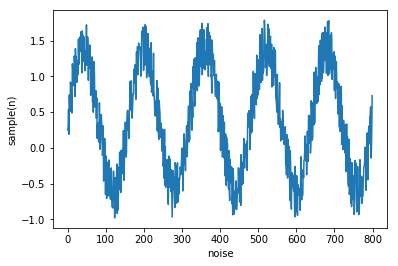

In [5]:
y = np.sin(2 * np.pi * f * x / Fs)+noise
plt.plot(x, y)
plt.xlabel('noise')
plt.ylabel('sample(n)')
plt.show()

In [4]:
def gaussian_kernel(u):
    return math.pow(2*math.pi, -1/2) * math.exp((-1 * math.pow(u, 2))/2)

In [5]:
def q_kernel(u):
    if abs(u <= 1):
        return (15/16) * math.pow((1-math.pow(u, 2)), 2)
    else:
        return 0

In [6]:
def euclidian_distance(x1,x2):
    return np.linalg.norm(x1-x2)

In [19]:
def a(h, x, xl, y):
    s = 0
    s2 = 0
    for i, x_i in enumerate(xl):
        K = gaussian_kernel(euclidian_distance(x, x_i)/h)
        s += y[i] * K
        s2 += K
    return s/s2

In [34]:
a_h = []
for x_i in x:
    a_h.append(a(1, x_i, x, y))
a_h = np.array(a_h)

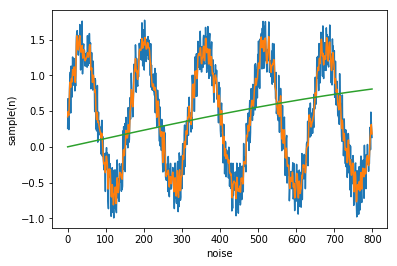

In [35]:
y_c = np.sin(2 * np.pi * f * x / Fs)
plt.plot(x, y)
plt.plot(x, a_h)
plt.plot(x, y_c)
plt.xlabel('noise')
plt.ylabel('sample(n)')
plt.show()

In [36]:
def SSE(a_h, y):
    SSE = 0
    for i in range(len(y)):
        SSE += math.pow((a_h[i] - y[i]), 2)
    return SSE

In [91]:
SSE(a_h, y)

19.708299937487833

# LOO

In [87]:
from tqdm import tqdm
optimal_h = []
for h in tqdm(range(1, 30)):
    c_h = 0
    a_h = []
    for i, x_i in enumerate(x):
        a_h.append(a(h, x_i, x[np.arange(len(x))!=i], y))
        c_h += math.pow((a_h[i] - y[i]), 2)
    optimal_h.append(c_h)

100%|██████████| 29/29 [02:35<00:00,  5.36s/it]


In [88]:
optimal_h

[22.24769169359409,
 30.23189646320067,
 34.518932667711695,
 36.83530807642266,
 38.289740118277045,
 39.32337843895152,
 40.18438800865475,
 41.02864299458381,
 41.95171118215,
 43.01494889215756,
 44.263526943650945,
 45.73548321973436,
 47.465140068106685,
 49.483977270065374,
 51.82059779905721,
 54.500434172470236,
 57.54541479489028,
 60.973664036638844,
 64.79926220858805,
 69.03207326448187,
 73.6776402976442,
 78.73714628553513,
 84.20743731576981,
 90.0811059721208,
 96.34663278915102,
 102.98858341244478,
 109.98785835283333,
 117.32199114843154,
 124.96548953043099]

# LOWESS

In [25]:
from math import ceil
from scipy import linalg
def lowess(x, y, f=2. / 3., iter=3):
    n = len(x)
    r = int(ceil(f * n))
    h = [np.sort(np.abs(x - x[i]))[r] for i in range(n)]
    w = np.clip(np.abs((x[:, None] - x[None, :]) / h), 0.0, 1.0)
    w = (1 - w ** 3) ** 3
    yest = np.zeros(n)
    delta = np.ones(n)
    for iteration in range(iter):
        for i in range(n):
            weights = delta * w[:, i]
            b = np.array([np.sum(weights * y), np.sum(weights * y * x)])
            A = np.array([[np.sum(weights), np.sum(weights * x)],
                          [np.sum(weights * x), np.sum(weights * x * x)]])
            beta = linalg.solve(A, b)
            yest[i] = beta[0] + beta[1] * x[i]
        residuals = y - yest
        s = np.median(np.abs(residuals))
        delta = np.clip(residuals / (6.0 * s), -1, 1)
        delta = (1 - delta ** 2) ** 2
    return yest

In [32]:
f = 0.15
yest = lowess(x, y, f=f, iter=3)

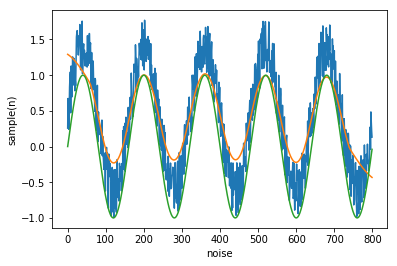

In [33]:
plt.plot(x, y)
plt.plot(x, yest)
plt.plot(x, y_c)
plt.xlabel('noise')
plt.ylabel('sample(n)')
plt.show()